# STEP 1 — Load the data & inspect it


In [217]:
import pandas as pd
df = pd.read_csv("/content/Data Science Job Salaries.csv")
print(df.head(5))
print(df.shape)
print(df.columns.tolist())
print(df.dtypes)
print(df.isnull().sum())

   S.No  work_year experience_level employment_type  \
0     0       2020               MI              FT   
1     1       2020               SE              FT   
2     2       2020               SE              FT   
3     3       2020               MI              FT   
4     4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50 

# STEP 2 — Clean the dataset

In [218]:
num_columns = len(df.columns)
print('number of column in dataset is: ', num_columns)
df.columns.tolist()

number of column in dataset is:  12


['S.No',
 'work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [219]:
from numpy import int64
# Remove the column name
df = df.drop('S.No', axis=1)

In [220]:
# Fix datatypes
df = df.astype({
    "salary_in_usd": "int64",
    "remote_ratio": "int64",
    'salary': 'int64'
    })

In [221]:
print(len(df.columns))

11


In [222]:
# Handle missing values
print(df.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [223]:
numerical_cols = df.select_dtypes(include=['number']).columns
print(f"Numerical Columns Identified: {list(numerical_cols)}")
print(len(numerical_cols))

Numerical Columns Identified: ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']
4


In [224]:
category_cols = df.select_dtypes(include=['object']).columns
print(f"Category Columns Identified: {list(category_cols)}")
print(len(category_cols))

Category Columns Identified: ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
7


In [225]:
# handle the duplicates
df = df.drop_duplicates()

In [226]:
print(df.reset_index(drop=True, inplace=True))
print(df.shape)

None
(565, 11)


## STEP 3 — Exploratory Data Analysis (EDA)

In [227]:
# 3.1 Summary statistics
df.describe()
df['salary_in_usd'].describe()

,salary_in_usd
count,565.000000
mean,110610.343363
std,72280.702792
min,2859.000000
25%,60757.000000
50%,100000.000000
75%,150000.000000
max,600000.000000


In [228]:
# Outlier detection using IQR method
numeric_cols = df.select_dtypes(include=['number'])
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:\n", Q1)
print("\nQ3:\n", Q3)
print("\nIQR:\n", IQR)
print("\nLower Bound:\n", lower_bound)
print("\nUpper Bound:\n", upper_bound)

# Finding outliers for each numeric column
outliers = ((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).sum()

print("\nNumber of outliers in each numeric column:\n", outliers)

Q1:
 work_year         2021.0
salary           67000.0
salary_in_usd    60757.0
remote_ratio        50.0
Name: 0.25, dtype: float64

Q3:
 work_year          2022.0
salary           165000.0
salary_in_usd    150000.0
remote_ratio        100.0
Name: 0.75, dtype: float64

IQR:
 work_year            1.0
salary           98000.0
salary_in_usd    89243.0
remote_ratio        50.0
dtype: float64

Lower Bound:
 work_year         2019.5
salary          -80000.0
salary_in_usd   -73107.5
remote_ratio       -25.0
dtype: float64

Upper Bound:
 work_year          2023.5
salary           312000.0
salary_in_usd    283864.5
remote_ratio        175.0
dtype: float64

Number of outliers in each numeric column:
 work_year         0
salary           44
salary_in_usd    10
remote_ratio      0
dtype: int64


<Axes: xlabel='salary_in_usd', ylabel='Count'>

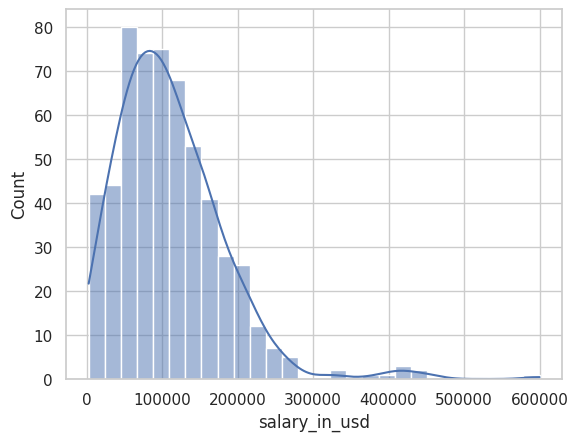

In [229]:
# Use seaborn for a histogram or KDE plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.histplot(df['salary_in_usd'], kde=True)

In [230]:
#Check value counts of experience_level
df['experience_level'].value_counts()

,count
experience_level,
SE,243
MI,208
EN,88
EX,26


<Axes: xlabel='experience_level'>

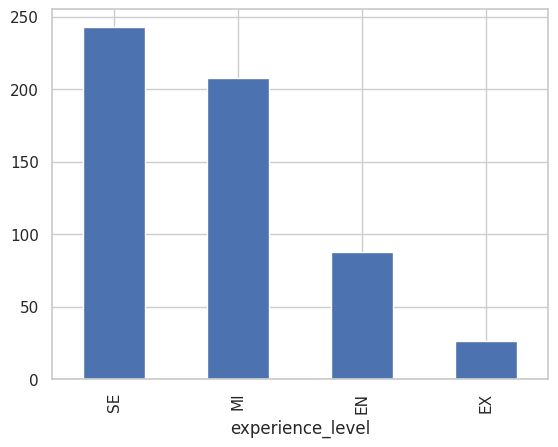

In [231]:
df['experience_level'].value_counts().plot(kind='bar')

In [232]:
df['experience_level'].value_counts(normalize=True) * 100

,proportion
experience_level,
SE,43.008850
MI,36.814159
EN,15.575221
EX,4.601770


In [233]:
df["employment_type"].value_counts().sort_values(ascending=False)

,count
employment_type,
FT,546
PT,10
CT,5
FL,4


In [234]:
df['job_title'].value_counts().sort_values(ascending=False)

,count
job_title,
Data Scientist,130
Data Engineer,121
Data Analyst,82
Machine Learning Engineer,39
Research Scientist,16
Data Science Manager,12
Data Architect,11
Machine Learning Scientist,8
Big Data Engineer,8


In [235]:
df['remote_ratio'].value_counts().sort_values(ascending=False)

,count
remote_ratio,
100,346
0,121
50,98


In [236]:
df['company_size'].value_counts().sort_values(ascending=False)

,count
company_size,
M,290
L,193
S,82


In [237]:
df['company_location'].value_counts().head(10)

,count
company_location,
US,318
GB,46
CA,28
DE,27
IN,24
FR,15
ES,14
GR,10
JP,6


<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

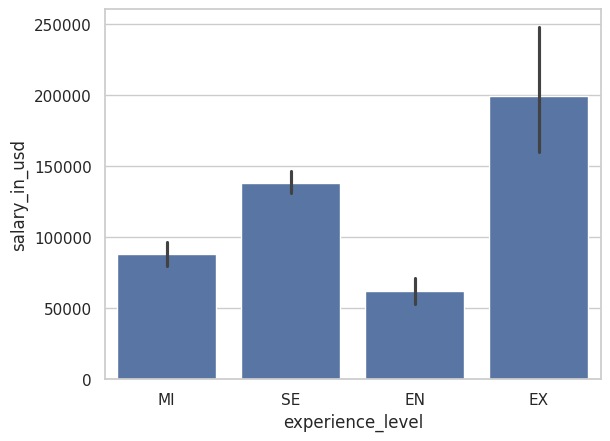

In [238]:
# Experience Level vs Salary
sns.barplot(x='experience_level', y='salary_in_usd', data=df)

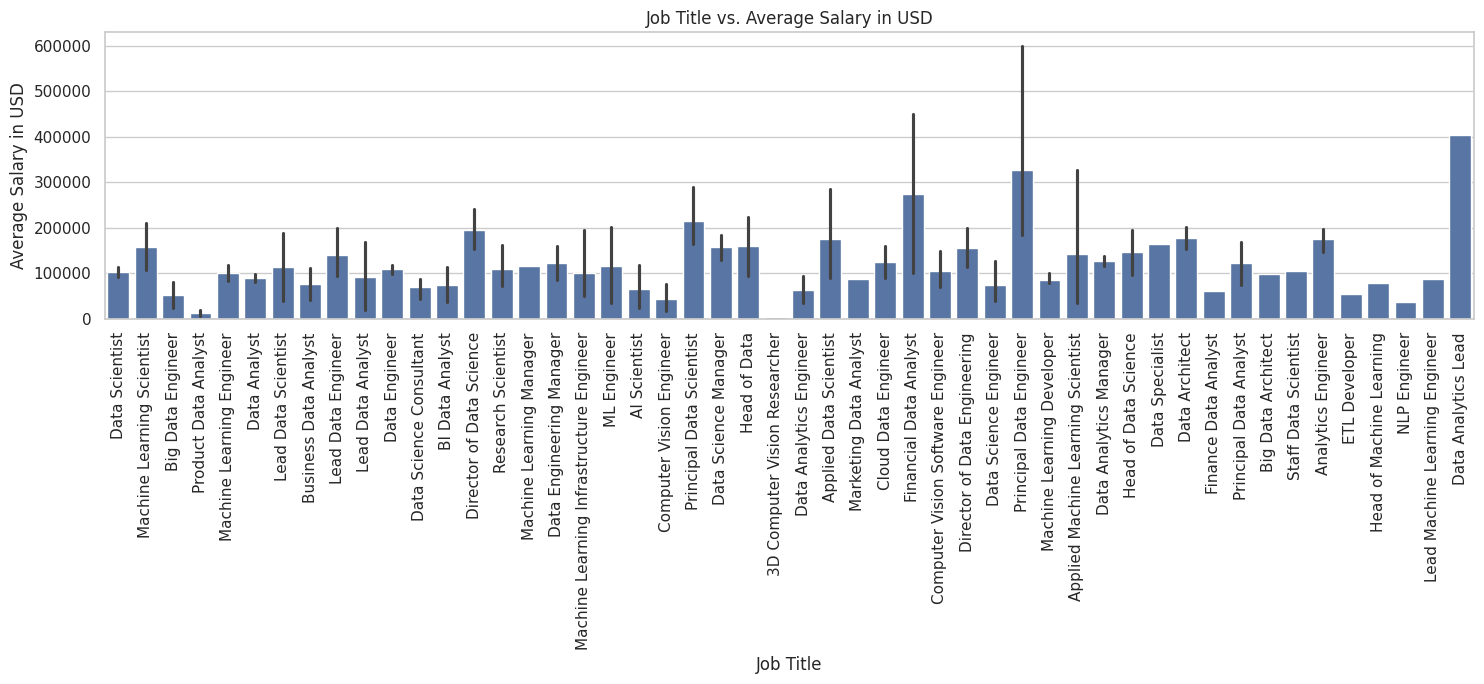

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.barplot(x='job_title', y='salary_in_usd', data=df)
plt.xticks(rotation=90)
plt.title('Job Title vs. Average Salary in USD')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Company Size vs. Average Salary in USD')

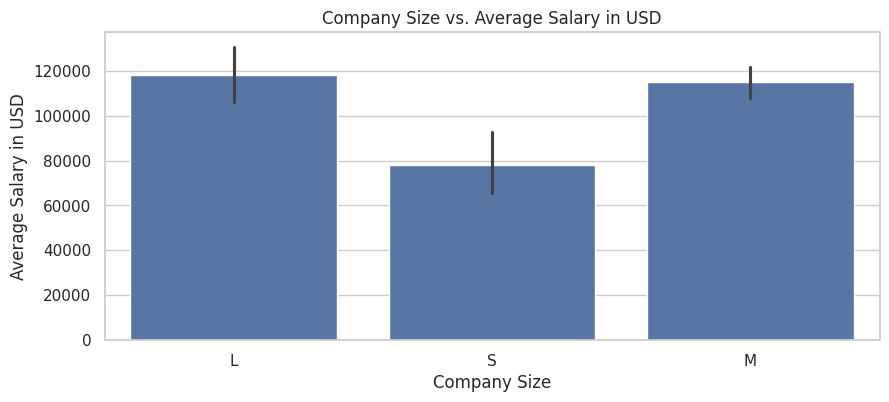

In [240]:
# Company Size vs Salary
plt.figure(figsize=(10, 4))
sns.barplot(x='company_size', y='salary_in_usd', data=df)
plt.xlabel('Company Size')
plt.ylabel('Average Salary in USD')
plt.title('Company Size vs. Average Salary in USD')

In [241]:
df.groupby('remote_ratio')['salary_in_usd'].mean()

,salary_in_usd
remote_ratio,
0,105785.404959
50,80721.897959
100,120763.190751


<Axes: xlabel='remote_ratio'>

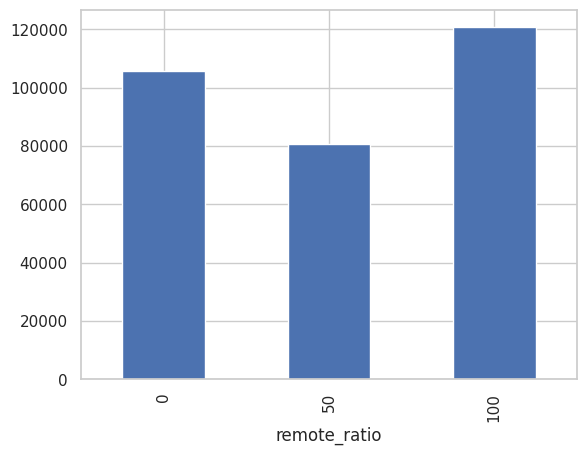

In [242]:
df.groupby('remote_ratio')['salary_in_usd'].mean().plot(kind='bar')

In [243]:
top_countries = df['employee_residence'].value_counts().head(10).index

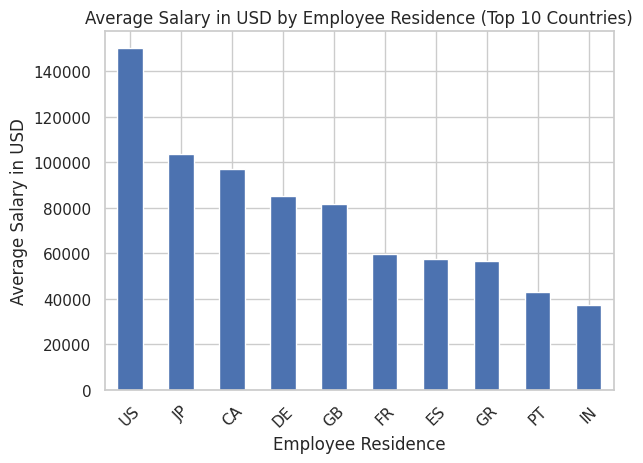

In [244]:
top_countries = df['employee_residence'].value_counts().head(10).index

df[df['employee_residence'].isin(top_countries)] \
  .groupby('employee_residence')['salary_in_usd'].mean() \
  .sort_values(ascending=False) \
  .plot(kind='bar')
import matplotlib.pyplot as plt
plt.title('Average Salary in USD by Employee Residence (Top 10 Countries)')
plt.xlabel('Employee Residence')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [245]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
numerical_cols

,work_year,salary,salary_in_usd,remote_ratio
0,2020,70000,79833,0
1,2020,260000,260000,0
2,2020,85000,109024,50
3,2020,20000,20000,0
4,2020,150000,150000,50
...,...,...,...,...
560,2022,154000,154000,100
561,2022,126000,126000,100
562,2022,129000,129000,0
563,2022,150000,150000,100


In [246]:
correlation_matrix = numerical_cols.corr()
correlation_matrix

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.082597,0.159326,0.058879
salary,-0.082597,1.000000,-0.083728,-0.012279
salary_in_usd,0.159326,-0.083728,1.000000,0.122849
remote_ratio,0.058879,-0.012279,0.122849,1.000000


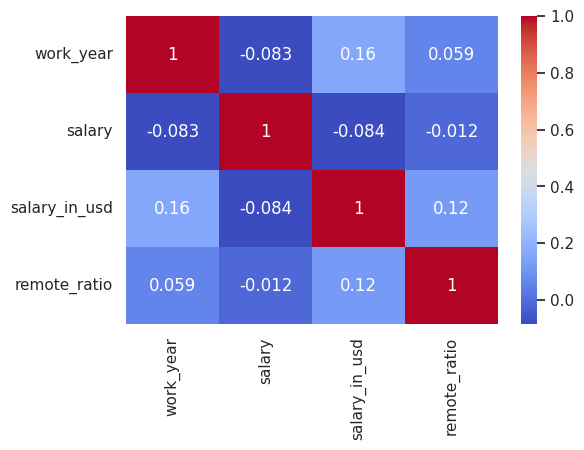

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [251]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

cols_to_drop = ['S.No', 'salary']
for col in cols_to_drop:
    if col in df.columns:
        df = df.drop(columns=[col])

label_cols = ['experience_level', 'employment_type', 'company_size']
le = LabelEncoder()
for col in label_cols:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Identify remaining object type columns for One-Hot Encoding
one_hot_cols = [col for col in df.select_dtypes(include='object').columns.tolist()]

# Apply One-Hot Encoding
if one_hot_cols:
    df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# Define X and y
y = df['salary_in_usd']
X = df.drop(columns=['salary_in_usd'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((452, 175), (113, 175))

# Liner Regression

In [252]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))

Linear Regression R2: 0.2528636813250589


# Random Forest


In [253]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Random Forest R2: 0.44427801281813073


In [254]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df['salary_range'] = pd.qcut(df['salary_in_usd'], q=3, labels=['Low','Mid','High'])

X = df.drop(columns=['salary_in_usd','salary_range'])
y = df['salary_range']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        High       0.78      0.74      0.76        39
         Low       0.78      0.76      0.77        42
         Mid       0.51      0.56      0.54        32

    accuracy                           0.70       113
   macro avg       0.69      0.69      0.69       113
weighted avg       0.71      0.70      0.70       113



In [256]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Ensure salary_range is dropped if it exists, as it's not a feature for remote_ratio prediction
X = df.drop(columns=['remote_ratio', 'salary_range'], errors='ignore')
y = df['remote_ratio']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

rf_remote = RandomForestClassifier()
rf_remote.fit(X_train, y_train)

pred_remote = rf_remote.predict(X_test)
print(classification_report(y_test, pred_remote))

              precision    recall  f1-score   support

           0       0.47      0.35      0.40        23
          50       0.40      0.30      0.34        20
         100       0.69      0.80      0.74        70

    accuracy                           0.62       113
   macro avg       0.52      0.48      0.49       113
weighted avg       0.59      0.62      0.60       113



In [258]:
X = df.drop(columns=['company_size', 'salary_range'], errors='ignore')
y = df['company_size']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

rf_size = RandomForestClassifier()
rf_size.fit(X_train, y_train)

pred_size = rf_size.predict(X_test)
print(classification_report(y_test, pred_size))

              precision    recall  f1-score   support

           0       0.52      0.65      0.58        43
           1       0.64      0.65      0.65        52
           2       0.67      0.22      0.33        18

    accuracy                           0.58       113
   macro avg       0.61      0.51      0.52       113
weighted avg       0.60      0.58      0.57       113



In [259]:
import numpy as np

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

for i in indices[:20]:
    print(f"{X.columns[i]} : {importances[i]}")

salary_in_usd : 0.2465907963845159
work_year : 0.07543559450786934
remote_ratio : 0.046824247331050124
experience_level : 0.04563624865608979
company_location_JP : 0.03096687587513426
job_title_Data Scientist : 0.02771253229124047
job_title_Data Engineer : 0.02262565279931543
job_title_Research Scientist : 0.019591064870748895
job_title_Machine Learning Scientist : 0.017603179892395345
employment_type : 0.015437760928395848
job_title_ML Engineer : 0.015194967226364065
job_title_Big Data Engineer : 0.014841253853726935
employee_residence_JP : 0.014237298929065913
job_title_Machine Learning Engineer : 0.013774590776515496
employee_residence_US : 0.013018716801239772
job_title_Computer Vision Software Engineer : 0.01286710777091901
job_title_Lead Data Engineer : 0.0122121431836107
job_title_Data Analyst : 0.012162697632761994
job_title_Data Science Consultant : 0.011355845119955845
job_title_Applied Data Scientist : 0.011275699155877013


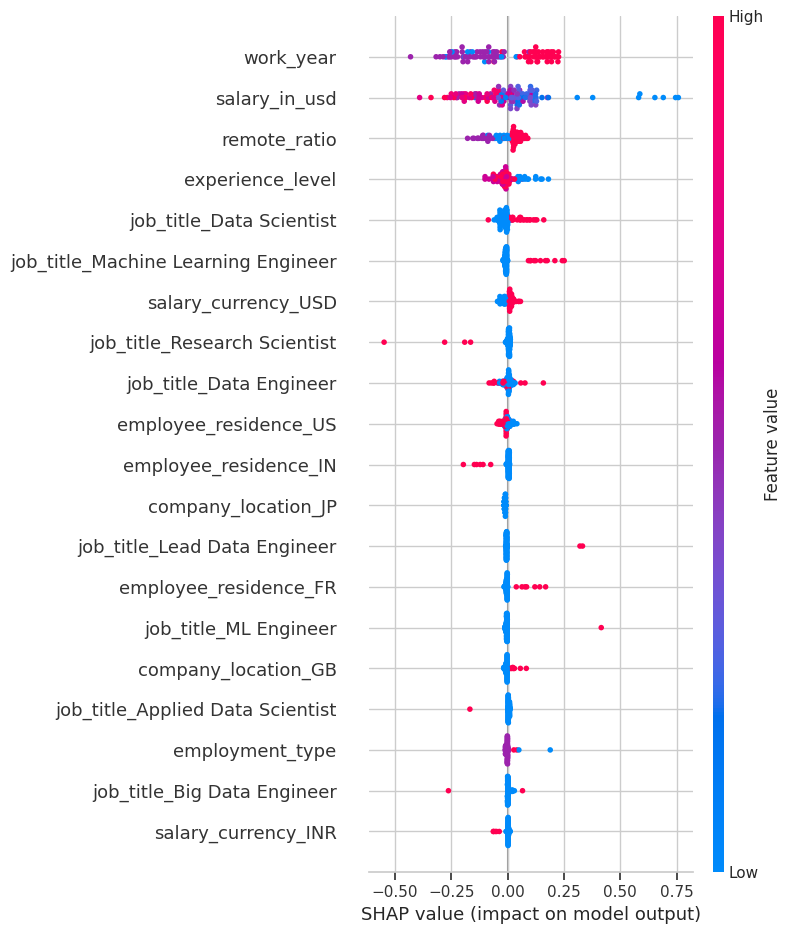

In [260]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [261]:
!pip install shap

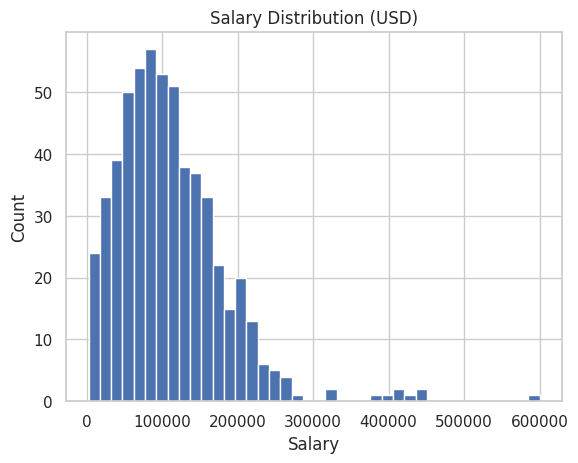

In [263]:
import matplotlib.pyplot as plt

plt.hist(df['salary_in_usd'], bins=40)
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

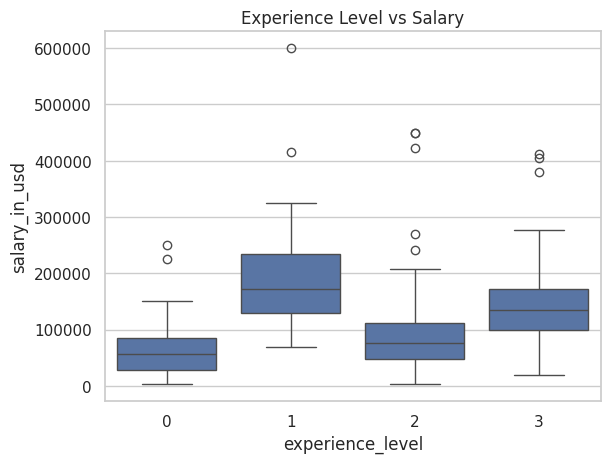

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['experience_level'], y=df['salary_in_usd'])
plt.title("Experience Level vs Salary")
plt.show()

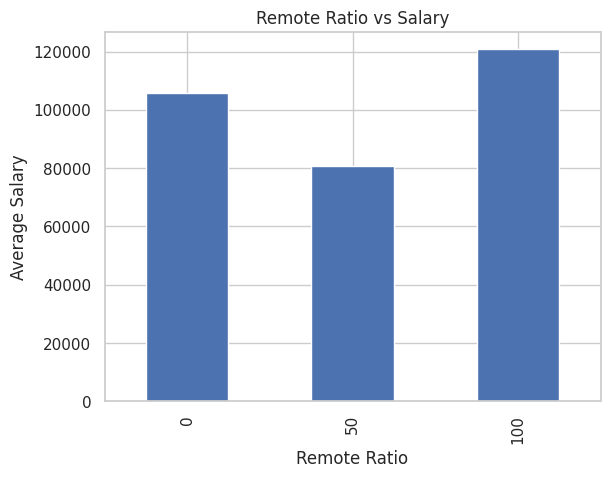

In [267]:
df.groupby('remote_ratio')['salary_in_usd'].mean().plot(kind='bar')
plt.title("Remote Ratio vs Salary")
plt.xlabel("Remote Ratio")
plt.ylabel("Average Salary")
plt.show()

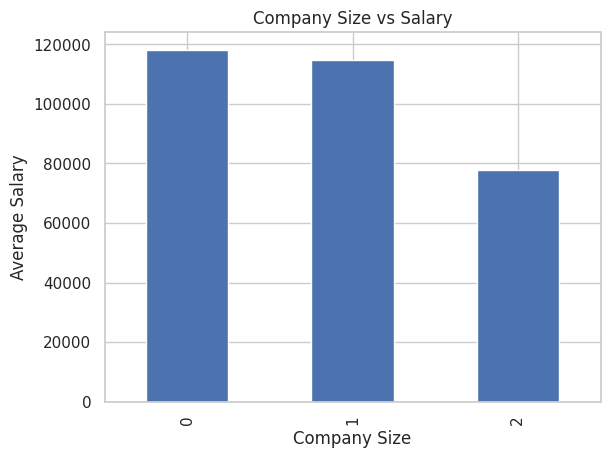

In [268]:
df.groupby('company_size')['salary_in_usd'].mean().plot(kind='bar')
plt.title("Company Size vs Salary")
plt.xlabel("Company Size")
plt.ylabel("Average Salary")
plt.show()

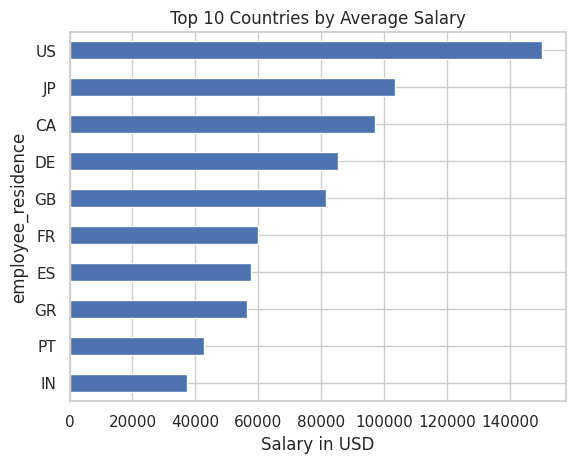

In [270]:
top_countries = df_new['employee_residence'].value_counts().head(10).index

df_new[df_new['employee_residence'].isin(top_countries)] \
  .groupby('employee_residence')['salary_in_usd'] \
  .mean().sort_values().plot(kind='barh')

plt.title("Top 10 Countries by Average Salary")
plt.xlabel("Salary in USD")
plt.show()

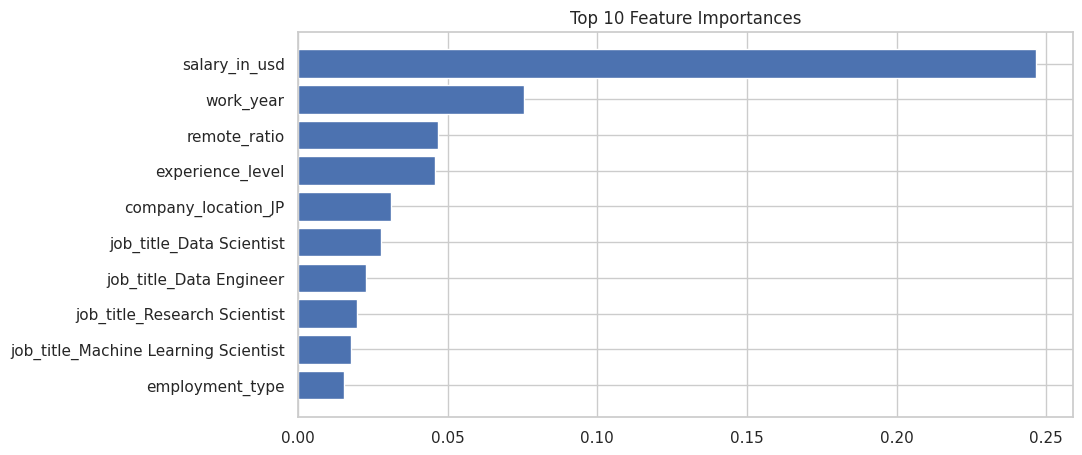

In [271]:
import numpy as np
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10,5))
plt.barh(X_train.columns[indices], importances[indices])
plt.title("Top 10 Feature Importances")
plt.show()

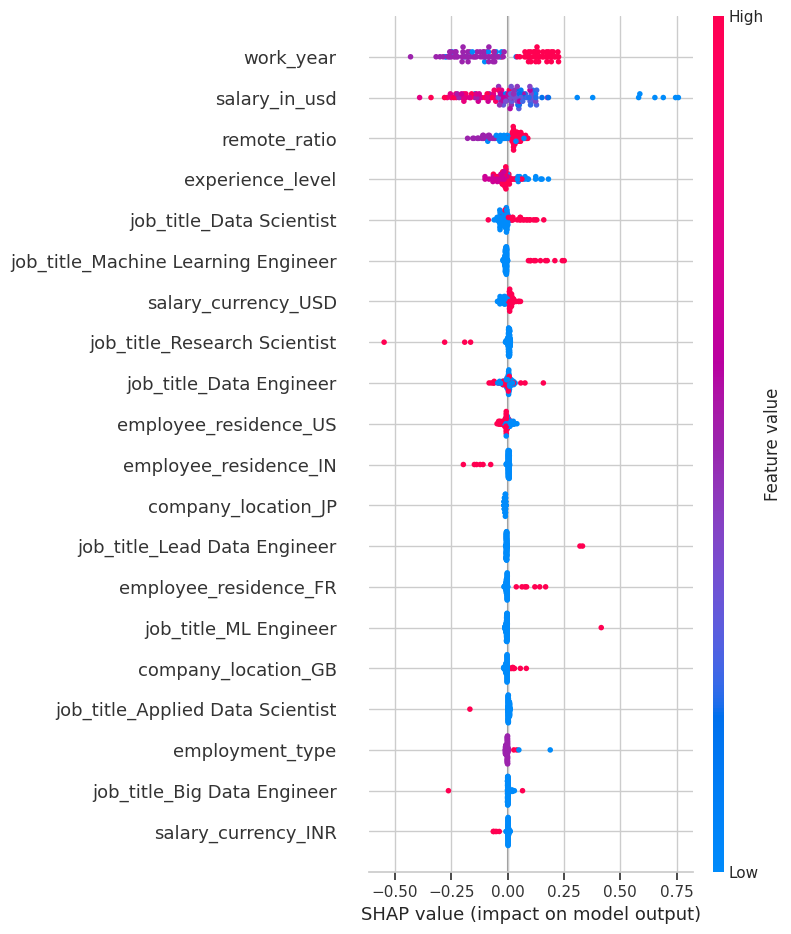

In [272]:
shap.summary_plot(shap_values, X_test)